In [1]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: C:\Users\ilave\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip


In [2]:
pip install soundfile

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: C:\Users\ilave\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip


In [3]:
import pandas as pad
import numpy as nup
import glob
import soundfile
import os
import sys
import matplotlib.pyplot as mplt


In [4]:
pip install librosa

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: C:\Users\ilave\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip


In [5]:
pip install matplotlib



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: C:\Users\ilave\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip


In [6]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: C:\Users\ilave\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip


In [7]:
pip list

Package                      Version
---------------------------- ------------
absl-py                      1.3.0
aiofiles                     22.1.0
aiohttp                      3.9.5
aiosignal                    1.3.1
aiosqlite                    0.19.0
anyio                        3.6.2
appdirs                      1.4.4
argon2-cffi                  21.3.0
argon2-cffi-bindings         21.2.0
arrow                        1.2.3
asttokens                    2.1.0
astunparse                   1.6.3
async-lru                    2.0.4
async-timeout                4.0.3
attrs                        23.2.0
audioread                    3.0.0
Babel                        2.12.1
backcall                     0.2.0
beautifulsoup4               4.11.1
bleach                       5.0.1
cachetools                   5.3.0
certifi                      2023.5.7
cffi                         1.15.1
charset-normalizer           3.1.0
colorama                     0.4.6
contourpy                    1.0.6



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: C:\Users\ilave\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip


In [8]:
import librosa
import librosa.display
import seaborn as sbn
import matplotlib.pyplot as mplt
from sklearn import metrics

In [9]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier 
from sklearn.metrics import accuracy_score

In [10]:
from IPython.display import Audio

In [11]:
import warnings
if not sys.warnoptions:
   warnings.simplefilter("ignore")
warnings.filterwarnings("ignore",category=DeprecationWarning)


In [12]:
RavdessData = "C:\\Users\\ilave\\Downloads\\archive\\audio_speech_actors_01-24\\"
#RavdessData = "C:\\Users\\ilave\\Downloads\\archive\\audio_speech_actors_01-24\\Actor_01\\"

In [13]:
ravdessDirectoryList = os.listdir(RavdessData)
fileEmotion = []
filePath = []
for dir in ravdessDirectoryList:
    actor = os.listdir(RavdessData + dir)
for file in actor:
    part = file.split('.')[0]
    part = part.split('-')
    fileEmotion.append(int(part[2]))
    filePath.append(RavdessData + dir + '/' + file)
emotion_df = pad.DataFrame(fileEmotion, columns=['Emotions'])
path_df = pad.DataFrame(filePath, columns=['Path'])
Ravdess_df = pad.concat([emotion_df, path_df], axis=1)

In [14]:
Ravdess_df.Emotions.replace({1:'neutral', 2:'calm', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'digust', 8:'surprise'},inplace=True) 
Ravdess_df.head()

,Emotions,Path
0,neutral,C:\Users\ilave\Downloads\archive\audio_speech_...
1,neutral,C:\Users\ilave\Downloads\archive\audio_speech_...
2,neutral,C:\Users\ilave\Downloads\archive\audio_speech_...
3,neutral,C:\Users\ilave\Downloads\archive\audio_speech_...
4,calm,C:\Users\ilave\Downloads\archive\audio_speech_...


In [15]:
dataPath = pad.concat([Ravdess_df], axis = 0)
dataPath.to_csv("data_path.csv",index=False)
dataPath.head()
dataPath.Emotions

0      neutral
1      neutral
2      neutral
3      neutral
4         calm
5         calm
6         calm
7         calm
8         calm
9         calm
10        calm
11        calm
12       happy
13       happy
14       happy
15       happy
16       happy
17       happy
18       happy
19       happy
20         sad
21         sad
22         sad
23         sad
24         sad
25         sad
26         sad
27         sad
28       angry
29       angry
30       angry
31       angry
32       angry
33       angry
34       angry
35       angry
36        fear
37        fear
38        fear
39        fear
40        fear
41        fear
42        fear
43        fear
44      digust
45      digust
46      digust
47      digust
48      digust
49      digust
50      digust
51      digust
52    surprise
53    surprise
54    surprise
55    surprise
56    surprise
57    surprise
58    surprise
59    surprise
Name: Emotions, dtype: object

In [16]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: C:\Users\ilave\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip


In [17]:
from librosa import display

In [18]:
def createWaveplot(data, sr, e):
    mplt.figure(figsize=(10,3))
    mplt.title('Waveplot for audio with {} emotion'.format(e), size=15)
    librosa.display.waveshow(data, sr=sr)
    mplt.show()

In [19]:
def createSpectrogram(data, sr, e):
    X = librosa.stft(data)
    Xdb = librosa.amplitude_to_db(abs(X)) 
    mplt.figure(figsize=(12, 3))
    mplt.title('Spectrogram for audio with {} emotion'.format(e), size=15) 
    librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
    mplt.colorbar()

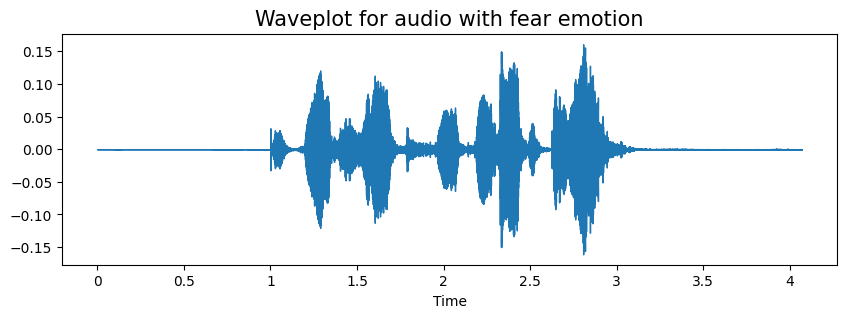

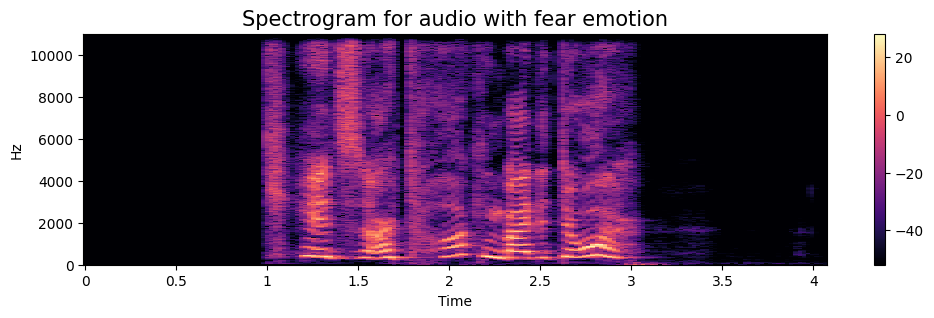

In [20]:
emotion='fear'
path = nup.array(dataPath.Path[dataPath.Emotions==emotion])[1] 
data, samplingRate = librosa.load(path) 
createWaveplot(data, samplingRate, emotion)
createSpectrogram(data, samplingRate, emotion)
Audio(path)

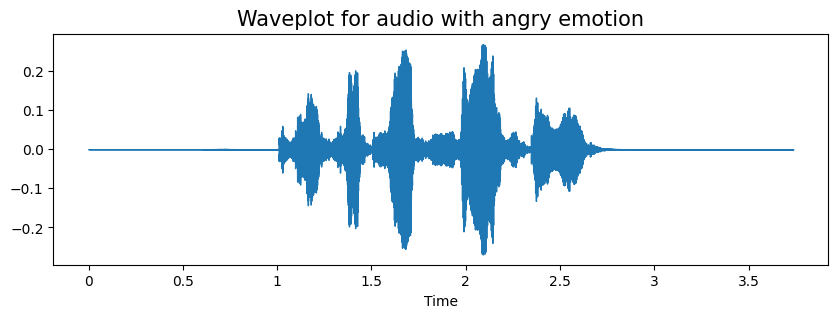

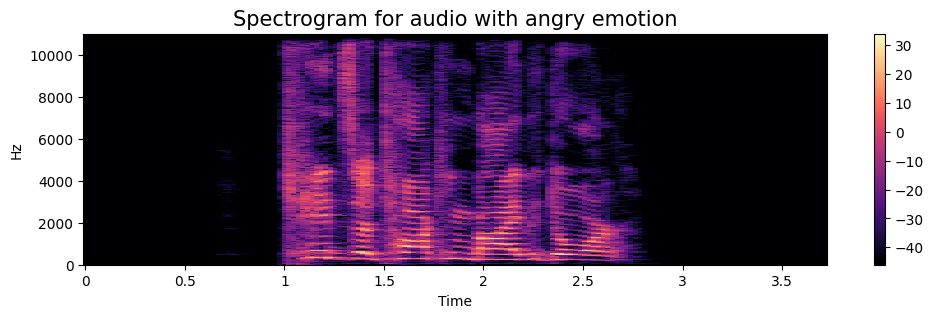

In [21]:
emotion='angry'
path = nup.array(dataPath.Path[dataPath. Emotions==emotion]) [1]
data, samplingRate= librosa.load(path)
createWaveplot(data, samplingRate, emotion)
createSpectrogram (data, samplingRate, emotion)
Audio(path)

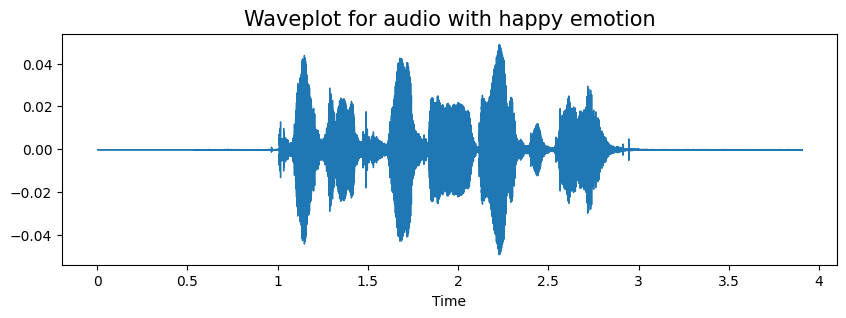

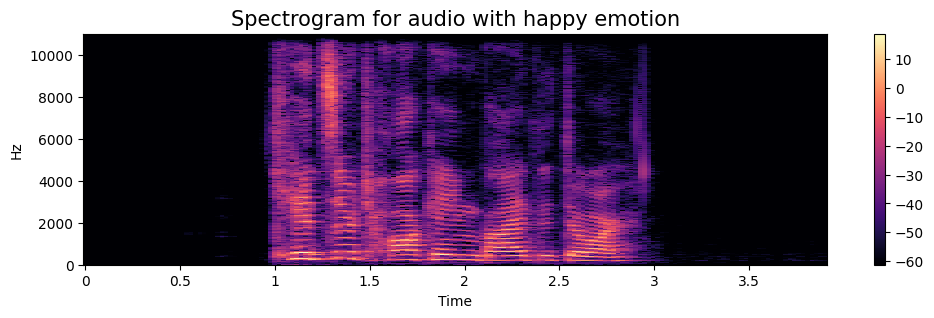

In [22]:
emotion='happy'
path = nup.array(dataPath.Path[dataPath. Emotions==emotion]) [1] 
data, samplingRate = librosa.load(path)
createWaveplot(data, samplingRate, emotion)
createSpectrogram (data, samplingRate, emotion)
Audio(path)